In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

imbalanced = ['ozone_level', 'wilt', 'auction', 'thoracic_surgery', 'thyroid_disease', 'seismic_bumps', 'pc2', 'satellite', 'climate_simulation_crashes',
              'image_segmentation']
balanced = ['eeg_eye_state', 'phishing_websites', 'cylinder_bands', 'banknote_authentication', 'credit_approval', 'concentric_spheres', 'xor', 'spiral',
            'mushroom', 'coupon_recommendations']
middle = ['qsar_biodegradation', 'blood_transfusion', 'employee_attrition', 'nba', 'telco_churn', 'online_shopping', 'breast_cancer', 'spambase', 'titanic', 'electrical_grid']

In [5]:
df = pd.read_csv('./SMOTE results v2.csv')
df = df.drop(columns=['model_category', 'perc_pred_missing'])
df.head()

,algorithm,dataset,accuracy,f1_score,precision,recall,auc_score,scenario
0,rt_bin_class_adaboost_sklearn,auction,0.8264,0.5535,0.4231,0.8000,0.9122,no-smote
1,rt_bin_class_adaboost_sklearn,banknote_authentication,0.9636,0.9609,0.9535,0.9685,0.9954,no-smote
2,rt_bin_class_adaboost_sklearn,blood_transfusion,0.6800,0.5102,0.4098,0.6757,0.7131,no-smote
3,rt_bin_class_adaboost_sklearn,breast_cancer,0.9649,0.9524,0.9756,0.9302,0.9931,no-smote
4,rt_bin_class_adaboost_sklearn,climate_simulation_crashes,0.9167,0.9529,0.9785,0.9286,0.9694,no-smote


In [6]:
# List of metrics to analyze
metrics = ['accuracy', 'f1_score', 'precision', 'recall', 'auc_score']

# Store results in a dictionary
better_scenario_percentage = {}

# Group by dataset and algorithm
grouped = df.groupby(['dataset', 'algorithm'])

# For each metric, compare the scores between the two scenarios
for metric in metrics:
    count_better_no_smote = 0
    count_better_smote = 0
    
    for _, group in grouped:
        no_smote_value = group[group['scenario'] == 'no-smote'][metric].values[0]
        smote_value = group[group['scenario'] == 'smote'][metric].values[0]
        
        if no_smote_value > smote_value:
            count_better_no_smote += 1
        elif smote_value > no_smote_value:
            count_better_smote += 1
    
    # Calculate percentages
    total_models = count_better_no_smote + count_better_smote
    better_scenario_percentage[metric] = {
        'no-smote': (count_better_no_smote / total_models) * 100,
        'smote': (count_better_smote / total_models) * 100
    }
print(better_scenario_percentage)


{'accuracy': {'no-smote': 69.13183279742765, 'smote': 30.86816720257235}, 'f1_score': {'no-smote': 51.09034267912772, 'smote': 48.90965732087228}, 'precision': {'no-smote': 62.46056782334385, 'smote': 37.53943217665615}, 'recall': {'no-smote': 37.67123287671233, 'smote': 62.328767123287676}, 'auc_score': {'no-smote': 58.06451612903226, 'smote': 41.935483870967744}}


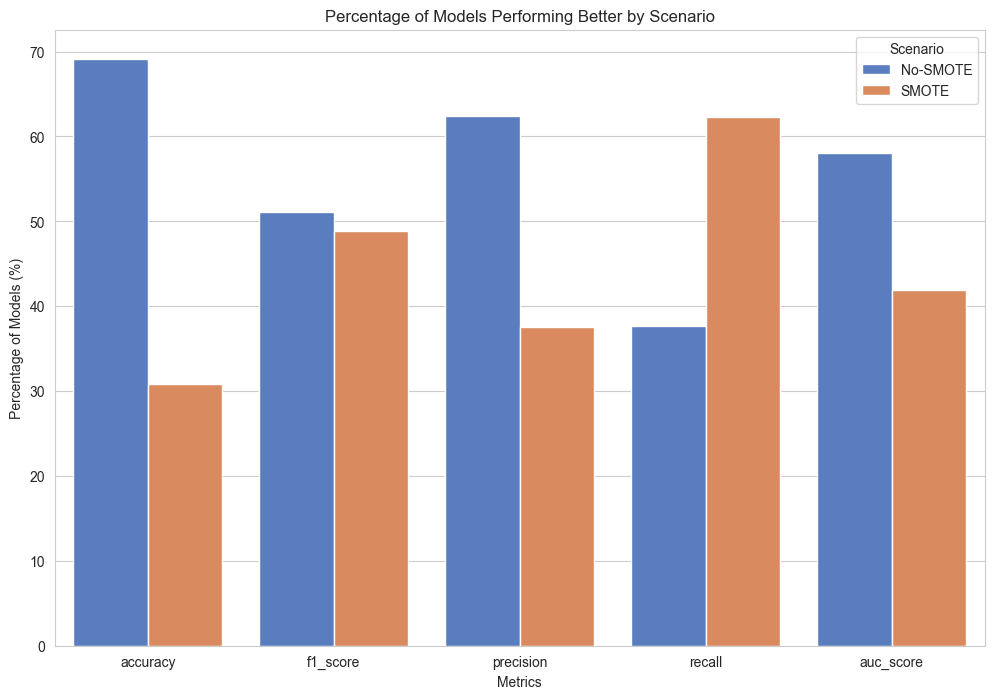

In [7]:
# Prepare the data for Seaborn
no_smote_percentages = [better_scenario_percentage[metric]['no-smote'] for metric in metrics]
smote_percentages = [better_scenario_percentage[metric]['smote'] for metric in metrics]

df_plot = pd.DataFrame({
    'Metrics': metrics * 2,
    'Percentage of Models (%)': no_smote_percentages + smote_percentages,
    'Scenario': ['No-SMOTE'] * len(metrics) + ['SMOTE'] * len(metrics)
})

# Set up the Seaborn style and plot size
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Create the bar plot using Seaborn
sns.barplot(x="Metrics", y="Percentage of Models (%)", hue="Scenario", data=df_plot, palette="muted")

# Display the plot title
plt.title('Percentage of Models Performing Better by Scenario')

plt.show()


## Imbalanced datasets

In [8]:
# Set up the figure to display multiple plots
def barchart(data):
    fig, axes = plt.subplots(nrows=len(metrics), figsize=(15, 5 * len(metrics)))

    # For each metric, create a bar chart showing the percentage of better-performing models by dataset
    for idx, metric in enumerate(metrics):
        # Group by dataset and algorithm, and compare the scores between the two scenarios for the specific metric
        better_count_per_dataset_metric = {}
        
        for (dataset, algorithm), group in data.groupby(['dataset', 'algorithm']):
            no_smote_value = group[group['scenario'] == 'no-smote'][metric].values[0]
            smote_value = group[group['scenario'] == 'smote'][metric].values[0]
            
            if dataset not in better_count_per_dataset_metric:
                better_count_per_dataset_metric[dataset] = {'no-smote': 0, 'smote': 0}
            
            if no_smote_value > smote_value:
                better_count_per_dataset_metric[dataset]['no-smote'] += 1
            elif smote_value > no_smote_value:
                better_count_per_dataset_metric[dataset]['smote'] += 1

        # Calculate the percentage of better-performing models for the specific metric
        better_percentage_per_dataset_metric = {}
        for dataset, counts in better_count_per_dataset_metric.items():
            total = counts['no-smote'] + counts['smote']
            if total == 0:
                better_percentage_per_dataset_metric[dataset] = {'no-smote': 0, 'smote': 0}
            else:
                better_percentage_per_dataset_metric[dataset] = {
                    'no-smote': (counts['no-smote'] / total) * 100,
                    'smote': (counts['smote'] / total) * 100
                }
        
        # Convert the results into a DataFrame for visualization
        df_better_percentage_metric = pd.DataFrame(better_percentage_per_dataset_metric).T.reset_index().melt(id_vars="index")
        # Plot the data using Seaborn's barplot
        sns.barplot(x="index", y="value", hue="variable", data=df_better_percentage_metric, palette="muted", ax=axes[idx])
        axes[idx].set_title(f"Percentage of Better-Performing Models by Dataset for {metric}")
        axes[idx].set_xlabel("Dataset")
        axes[idx].set_ylabel("Percentage of Better Models (%)")
        axes[idx].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

## Imbalanced datasets

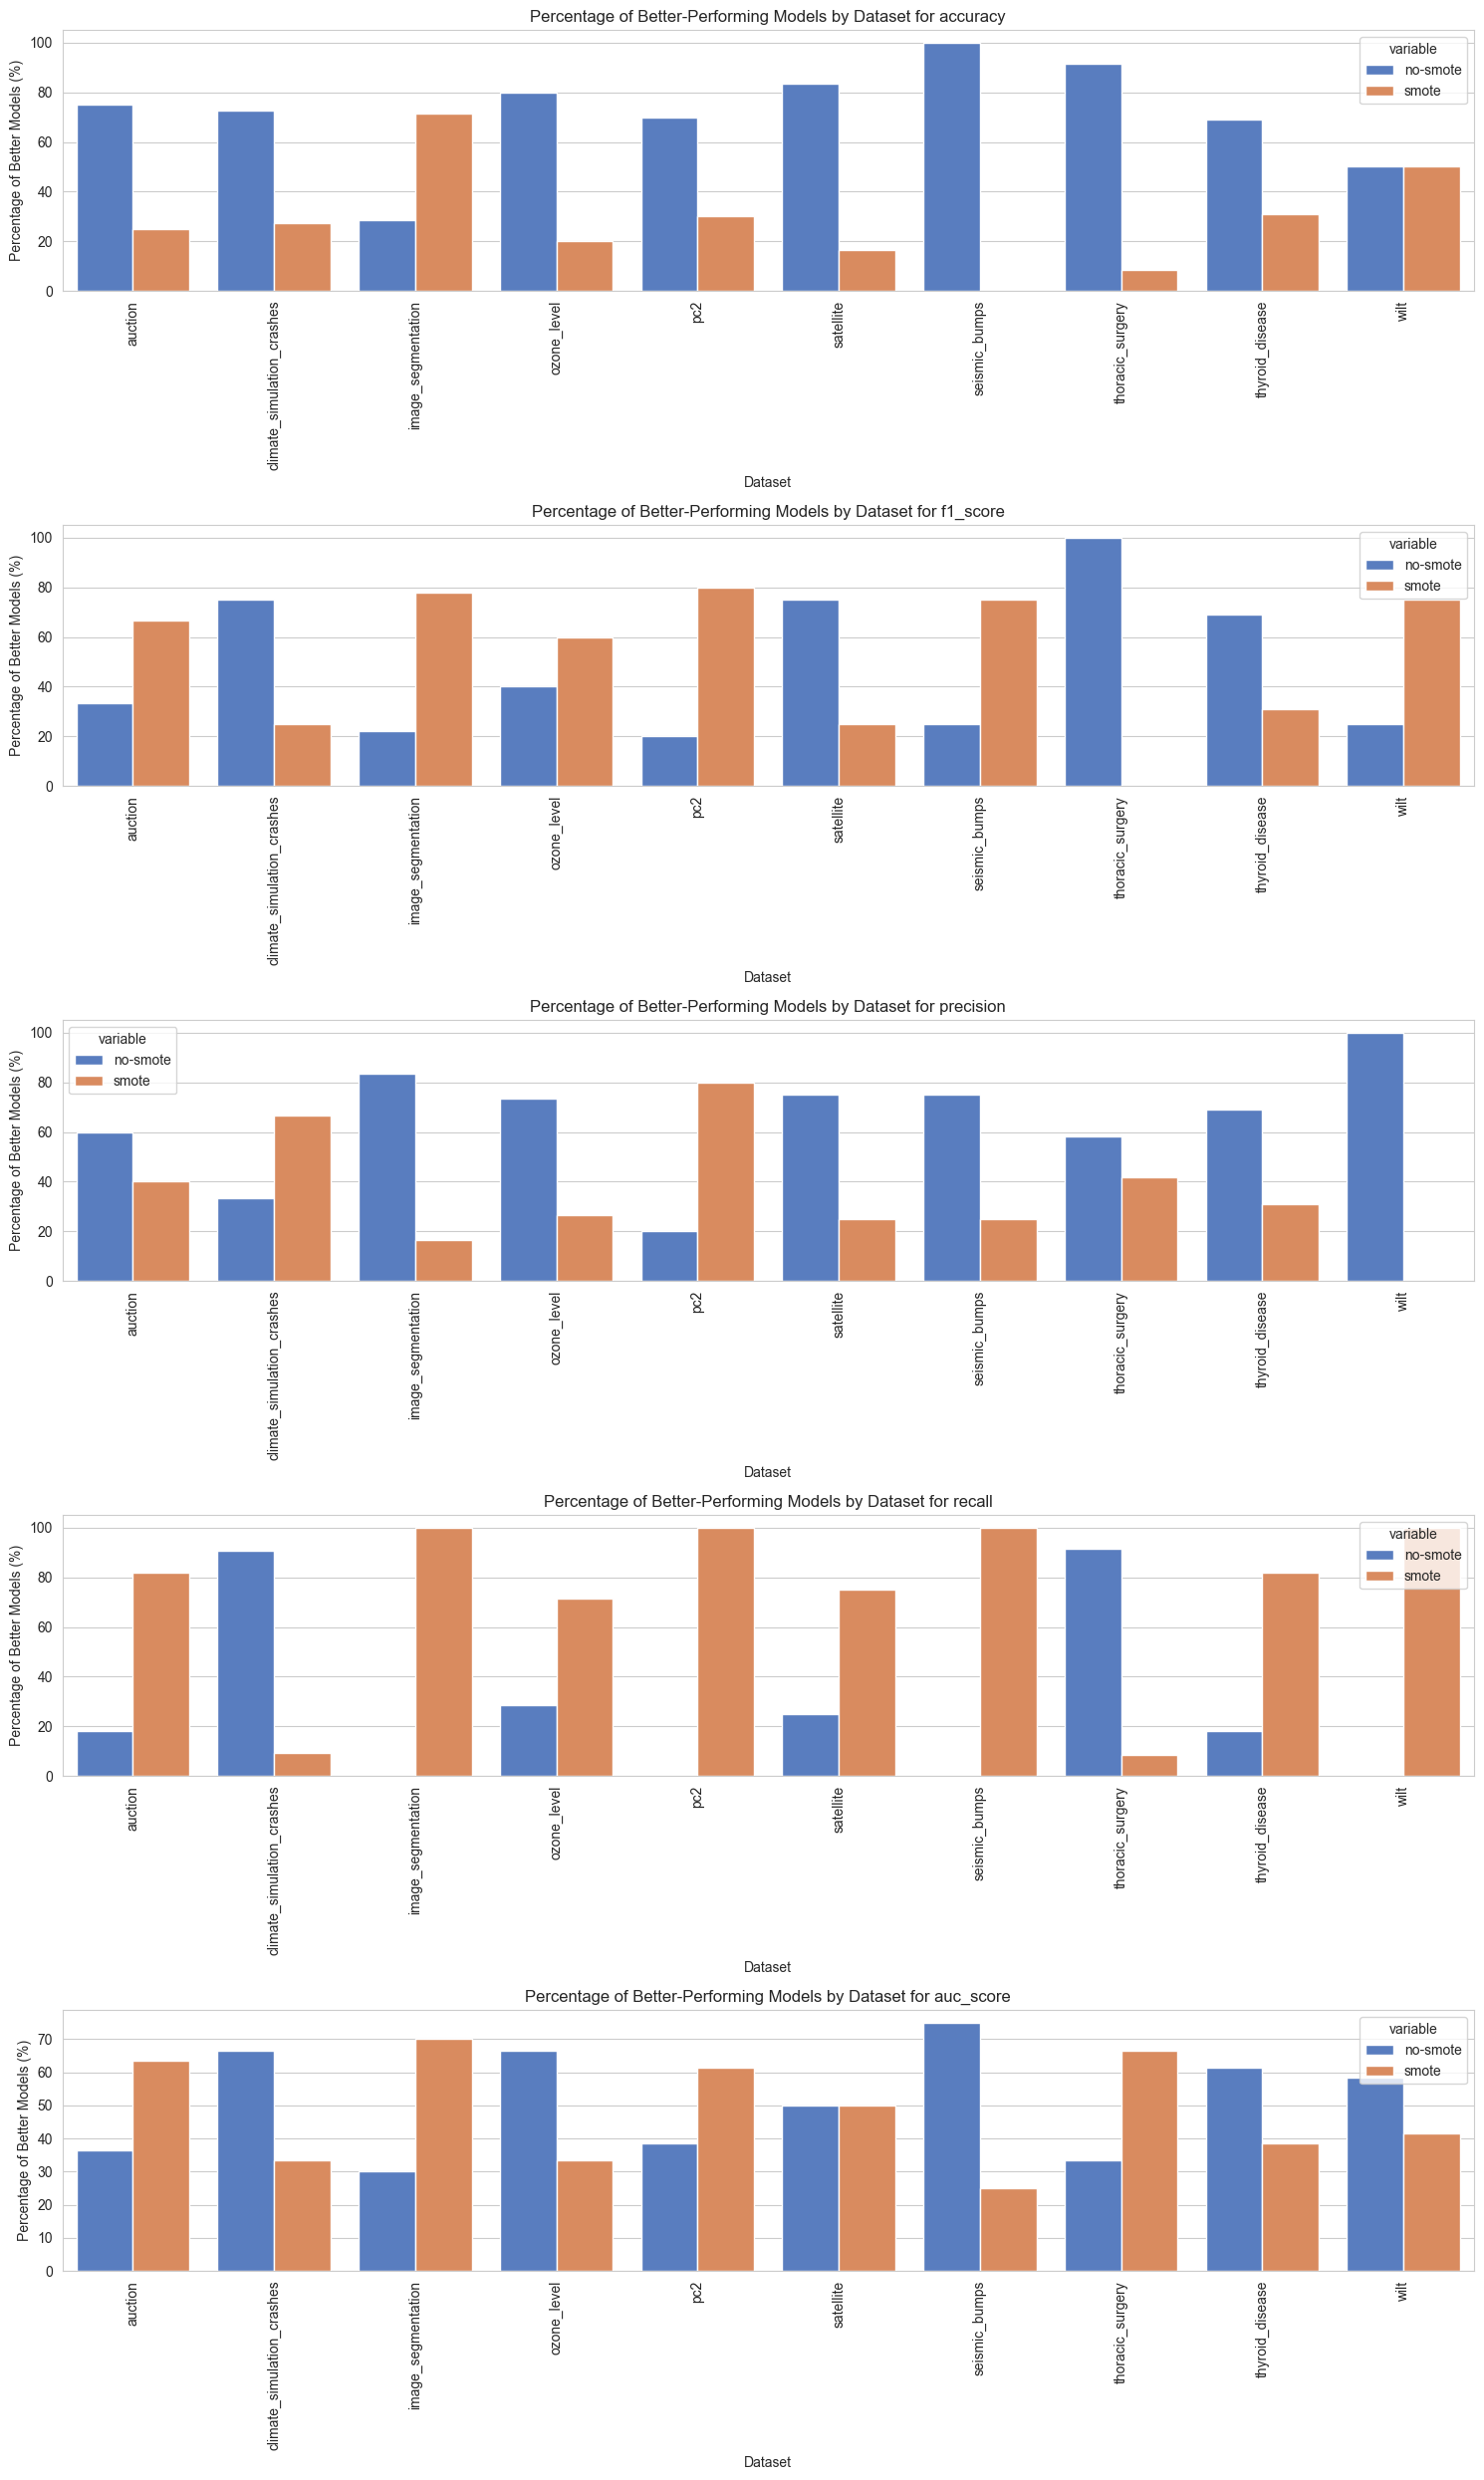

In [9]:
barchart(df[df['dataset'].isin(imbalanced)])

## Middle datasets

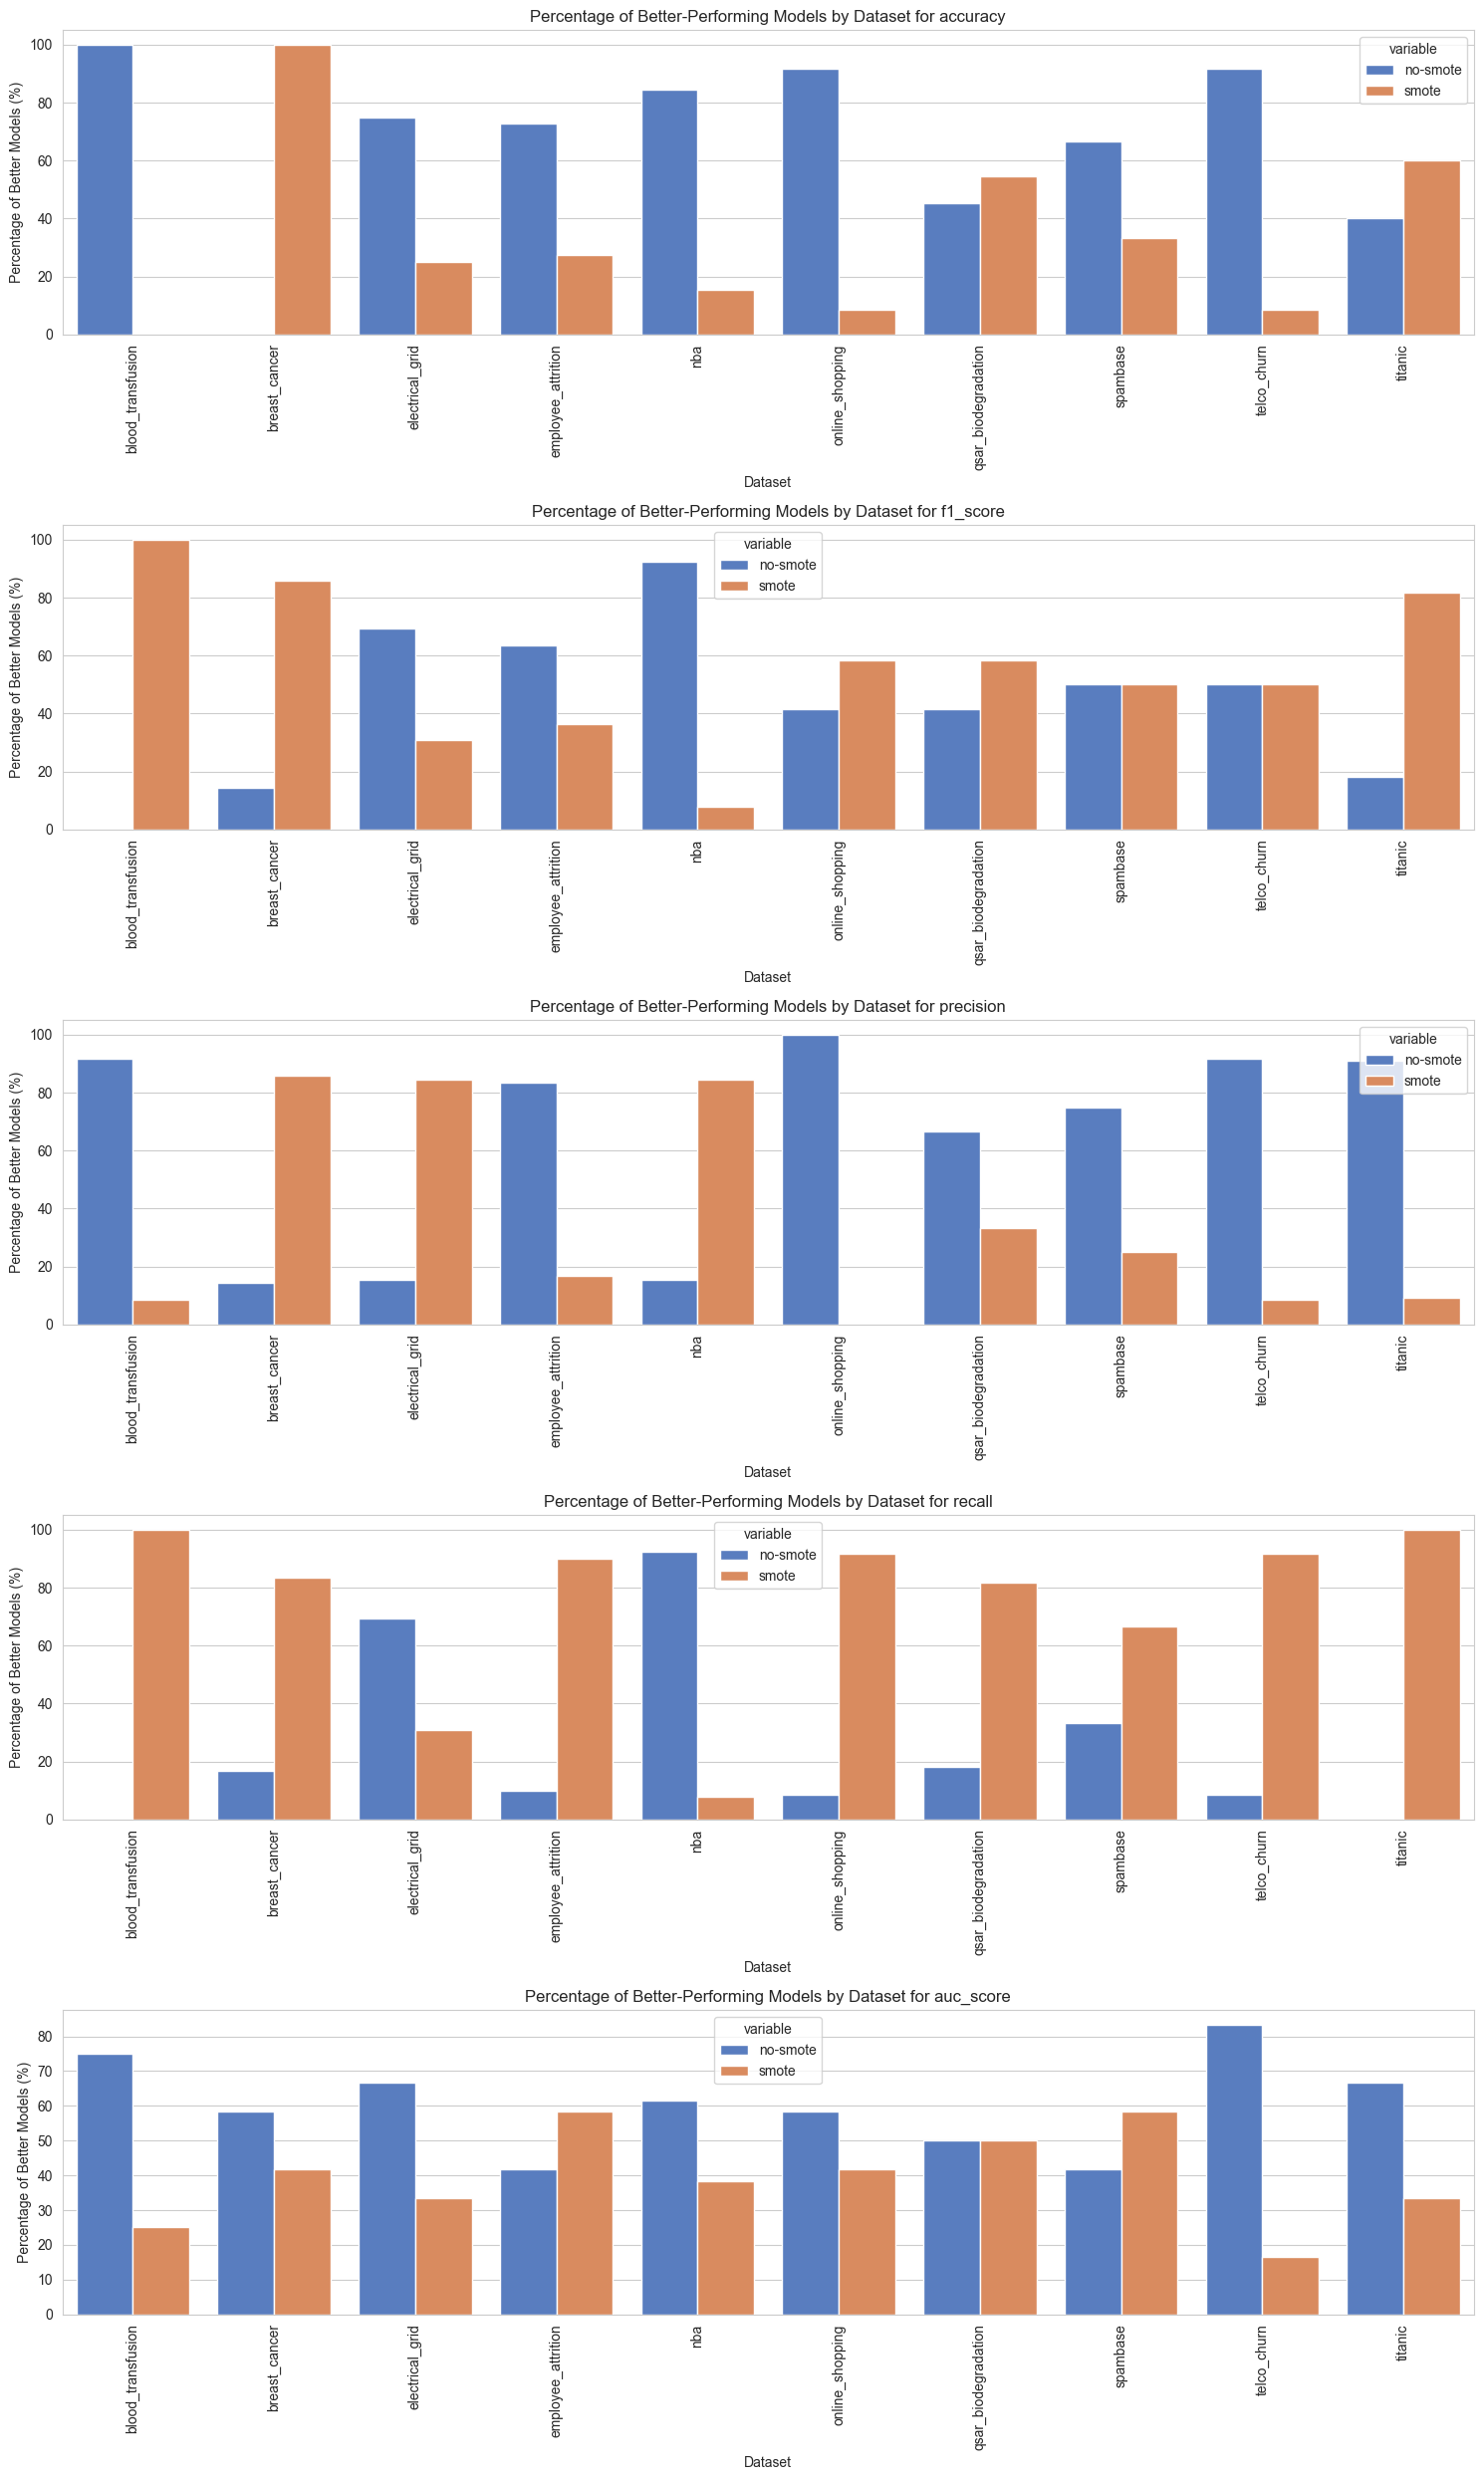

In [10]:
barchart(df[df['dataset'].isin(middle)])

## Balanced datasets

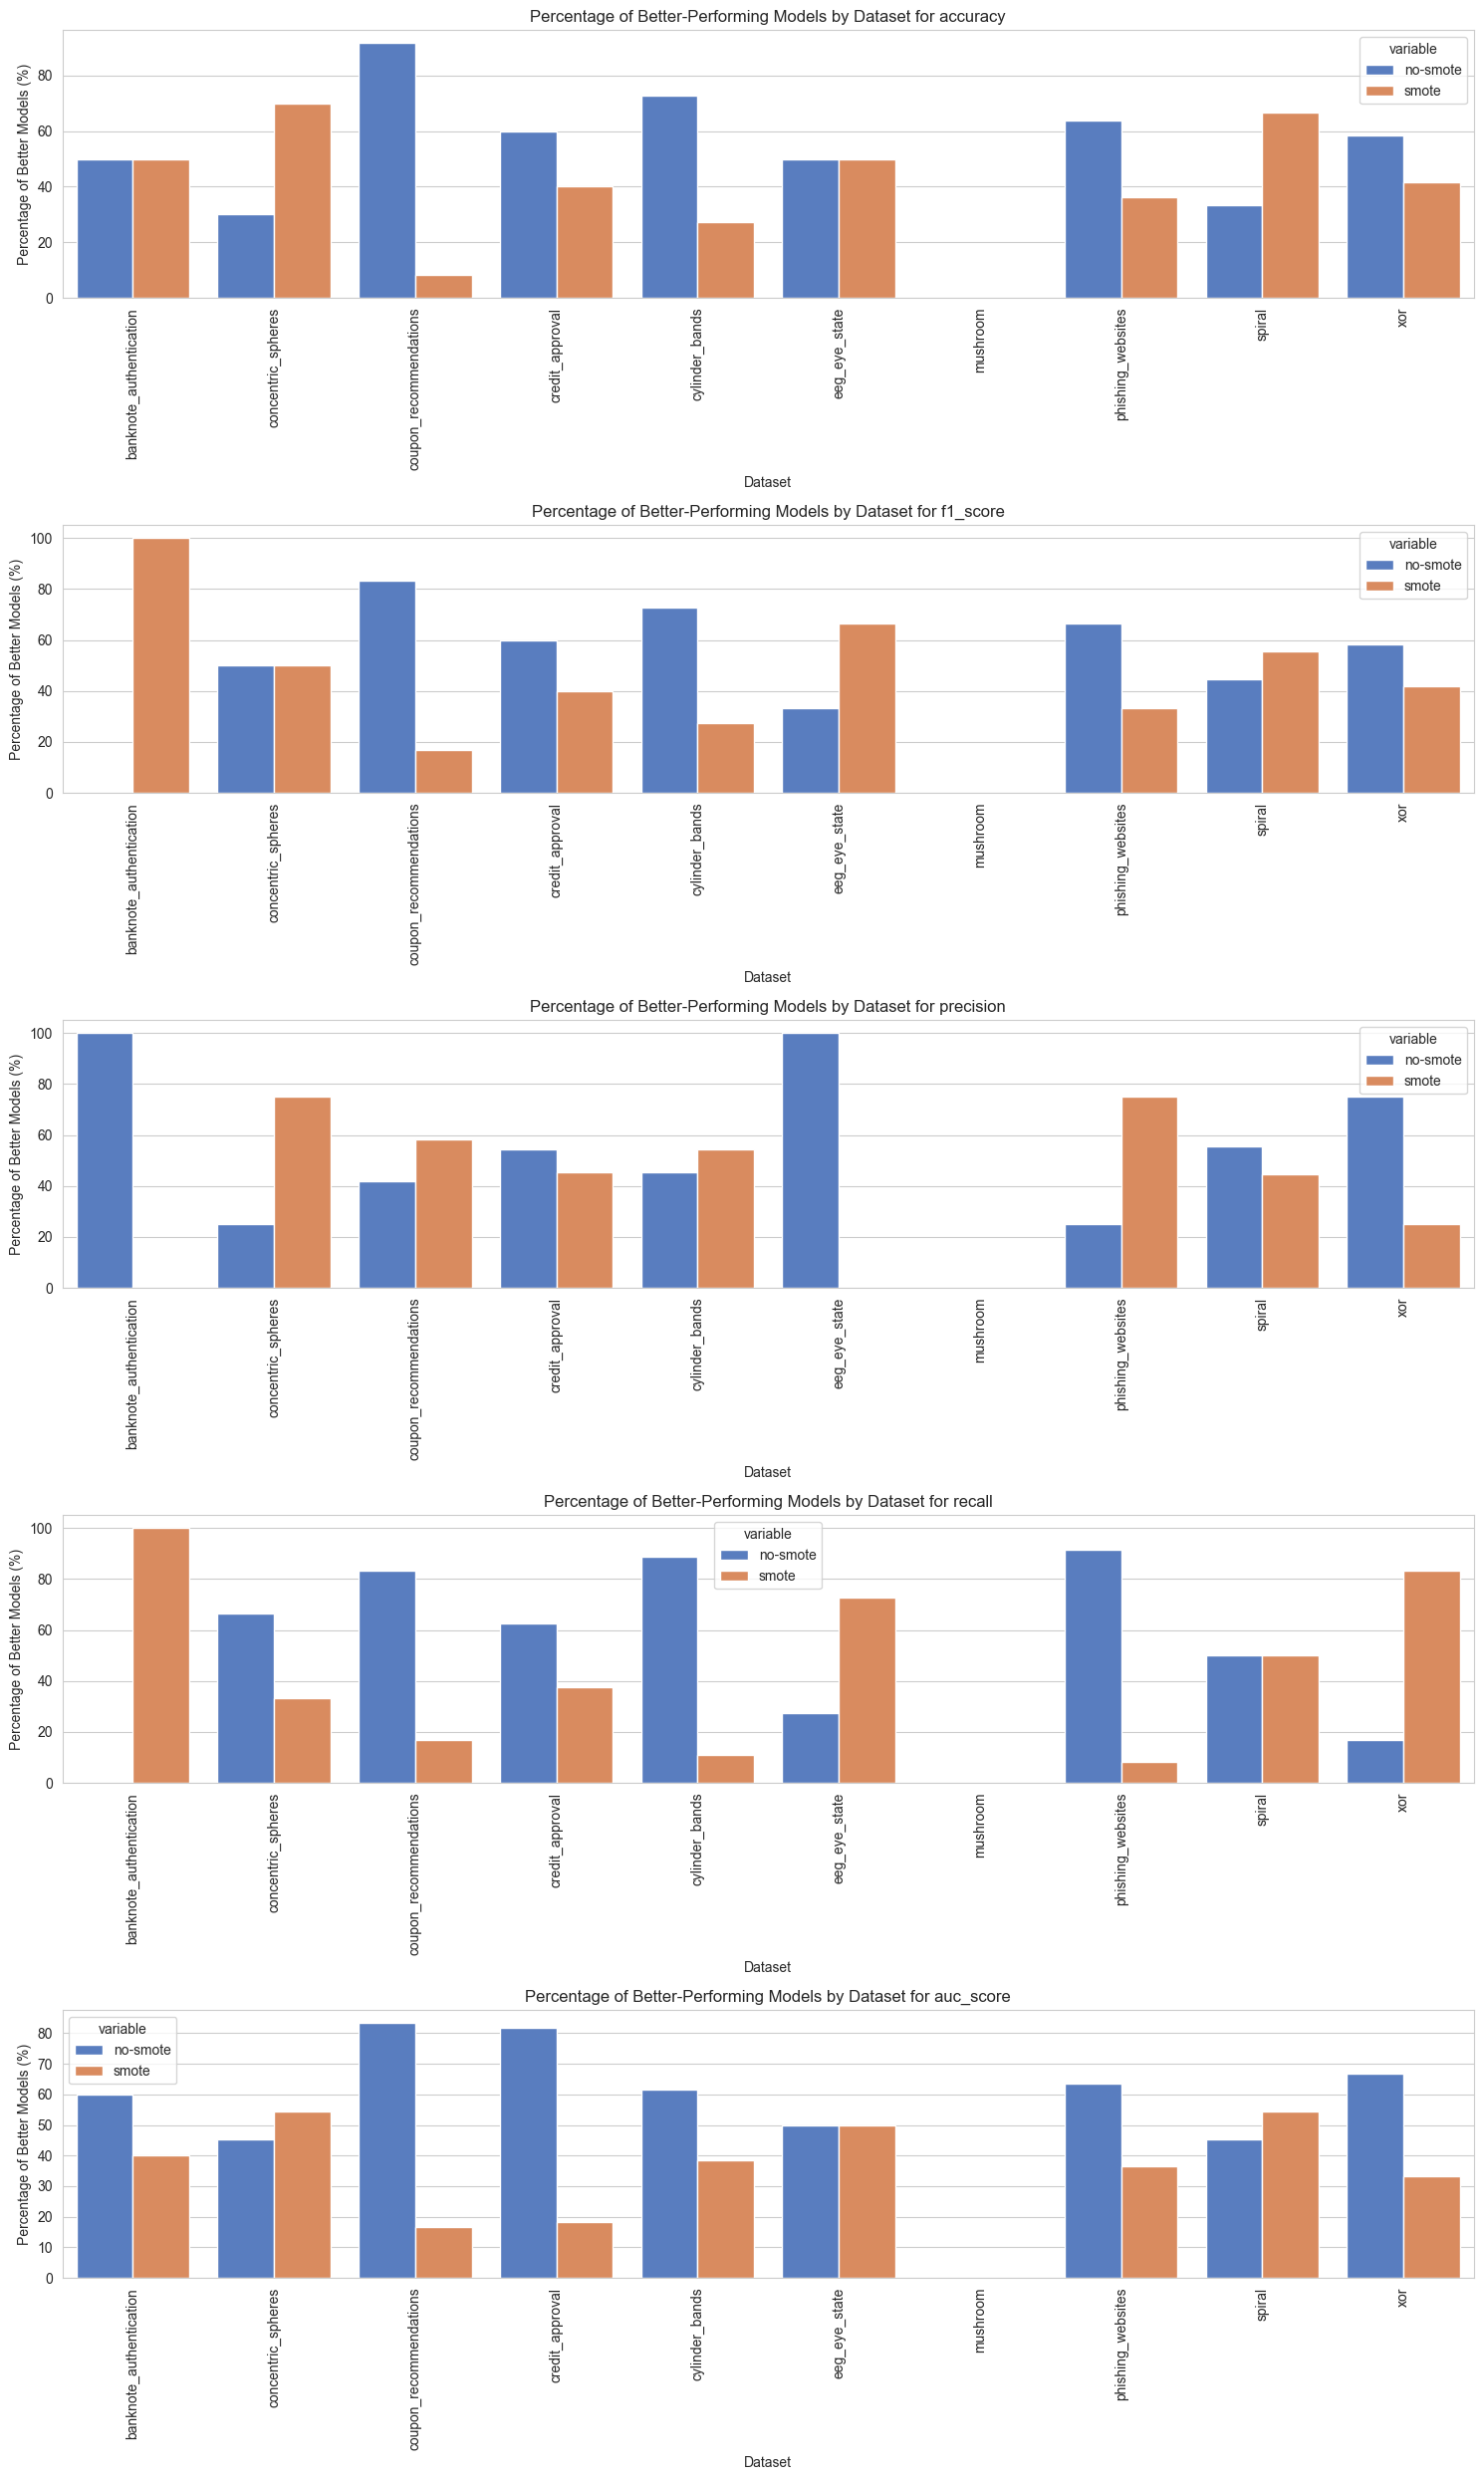

In [11]:
barchart(df[df['dataset'].isin(balanced)])

In [12]:
def balance_type(x):
    if x['dataset'] in balanced:
        return 'balanced'
    elif x['dataset'] in imbalanced:
        return 'imbalanced'
    else:
        return 'middle'

df['balance_type'] = df.apply(balance_type, axis=1)
df.head()

,algorithm,dataset,accuracy,f1_score,precision,recall,auc_score,scenario,balance_type
0,rt_bin_class_adaboost_sklearn,auction,0.8264,0.5535,0.4231,0.8000,0.9122,no-smote,imbalanced
1,rt_bin_class_adaboost_sklearn,banknote_authentication,0.9636,0.9609,0.9535,0.9685,0.9954,no-smote,balanced
2,rt_bin_class_adaboost_sklearn,blood_transfusion,0.6800,0.5102,0.4098,0.6757,0.7131,no-smote,middle
3,rt_bin_class_adaboost_sklearn,breast_cancer,0.9649,0.9524,0.9756,0.9302,0.9931,no-smote,middle
4,rt_bin_class_adaboost_sklearn,climate_simulation_crashes,0.9167,0.9529,0.9785,0.9286,0.9694,no-smote,imbalanced


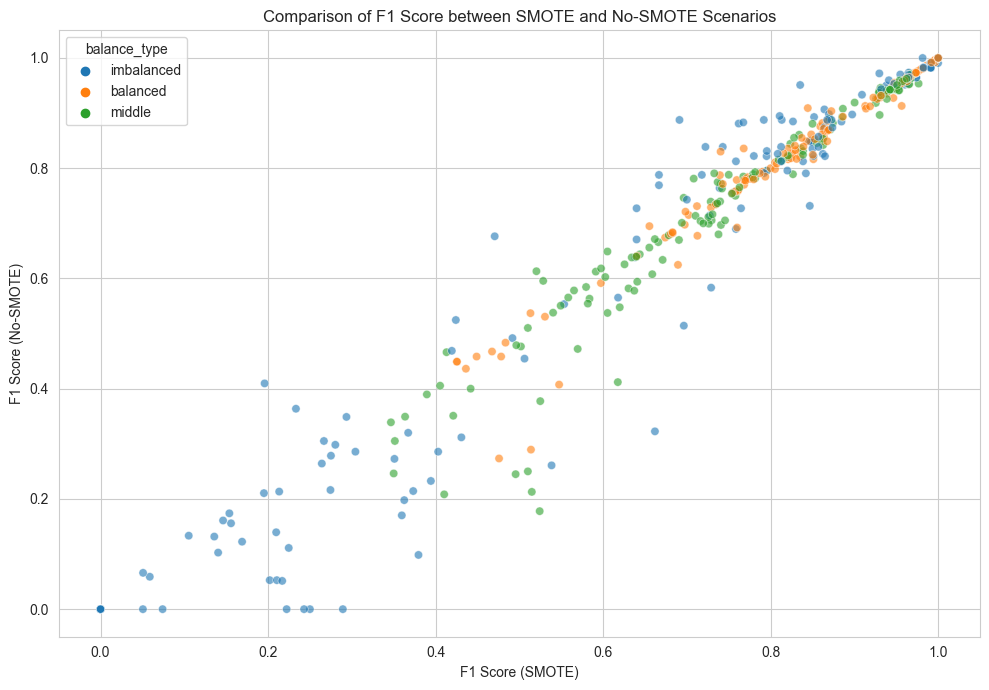

In [13]:
# Separate the data into "SMOTE" and "No-SMOTE" scenarios
smote_data = df[df['scenario'] == 'smote'].rename(columns={'f1_score': 'f1_score_smote', 'accuracy': 'accuracy_smote', 'recall': 'recall_smote', 'precision': 'precision_smote', 'auc_score': 'auc_score_smote'})
no_smote_data = df[df['scenario'] == 'no-smote'].rename(columns={'f1_score': 'f1_score_no_smote', 'accuracy': 'accuracy_no_smote', 'recall': 'recall_no_smote', 'precision': 'precision_no_smote', 'auc_score': 'auc_score_no_smote'})

merged_data = pd.merge(smote_data, no_smote_data, on=['dataset', 'algorithm', 'balance_type'])

# Plot the scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=merged_data, 
                x="f1_score_smote", 
                y="f1_score_no_smote",
                alpha=0.6, 
                color="green",
                edgecolor="w",
                hue='balance_type')

plt.title("Comparison of F1 Score between SMOTE and No-SMOTE Scenarios")
plt.xlabel("F1 Score (SMOTE)")
plt.ylabel("F1 Score (No-SMOTE)")

plt.tight_layout()
plt.show()



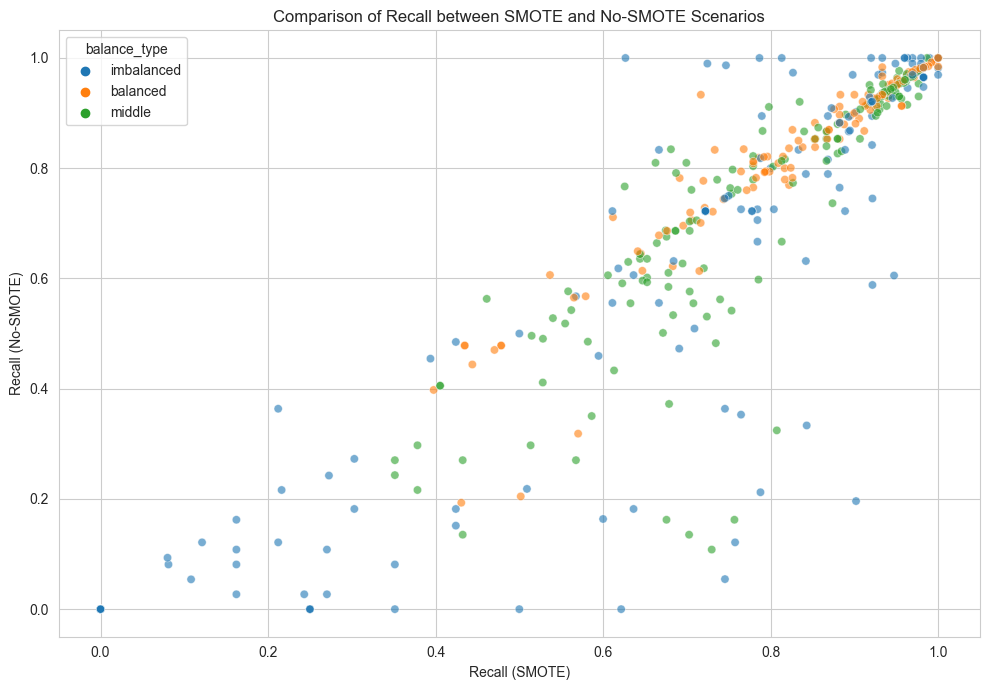

In [14]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=merged_data, 
                x="recall_smote", 
                y="recall_no_smote",
                alpha=0.6, 
                color="green",
                edgecolor="w",
                hue='balance_type')

plt.title("Comparison of Recall between SMOTE and No-SMOTE Scenarios")
plt.xlabel("Recall (SMOTE)")
plt.ylabel("Recall (No-SMOTE)")

plt.tight_layout()
plt.show()



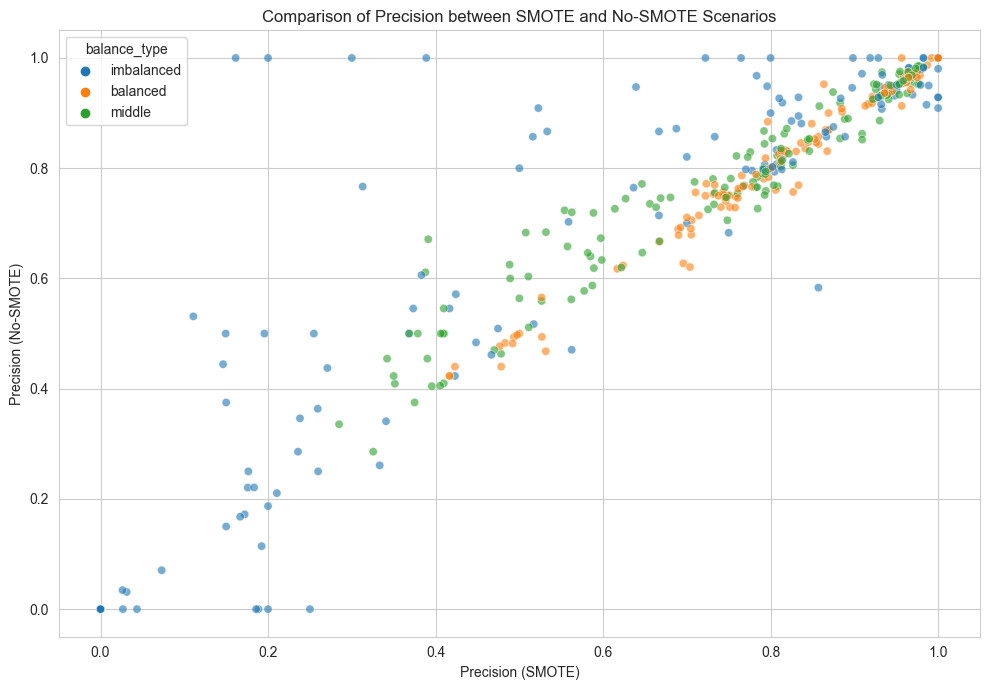

In [15]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=merged_data, 
                x="precision_smote", 
                y="precision_no_smote",
                alpha=0.6, 
                color="green",
                edgecolor="w",
                hue='balance_type')

plt.title("Comparison of Precision between SMOTE and No-SMOTE Scenarios")
plt.xlabel("Precision (SMOTE)")
plt.ylabel("Precision (No-SMOTE)")

plt.tight_layout()
plt.show()

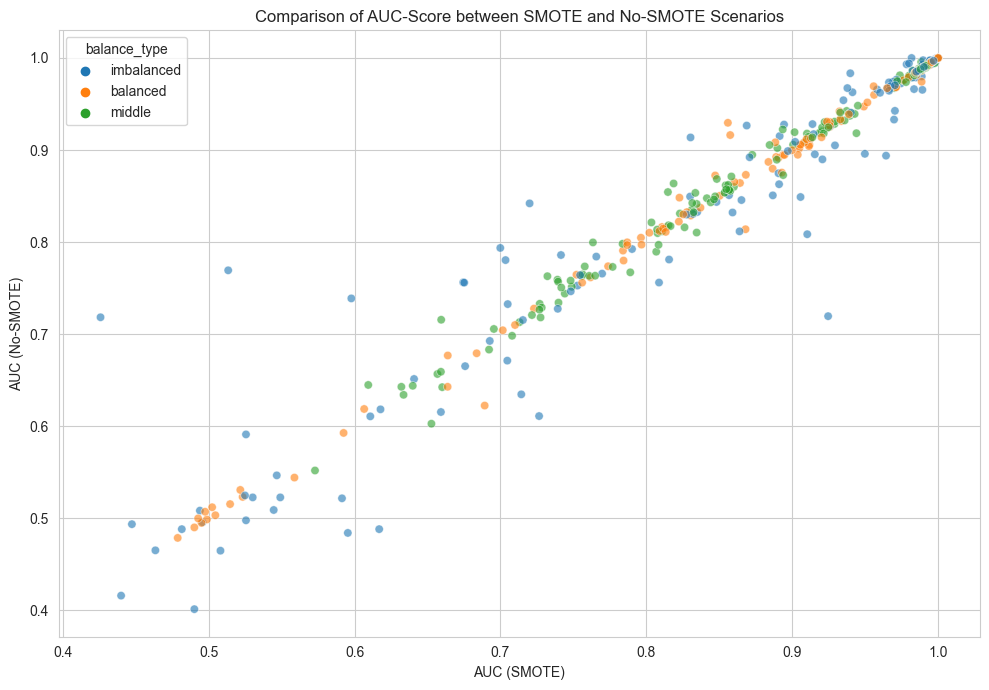

In [16]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=merged_data, 
                x="auc_score_smote", 
                y="auc_score_no_smote",
                alpha=0.6, 
                color="green",
                edgecolor="w",
                hue='balance_type')

plt.title("Comparison of AUC-Score between SMOTE and No-SMOTE Scenarios")
plt.xlabel("AUC (SMOTE)")
plt.ylabel("AUC (No-SMOTE)")

plt.tight_layout()
plt.show()

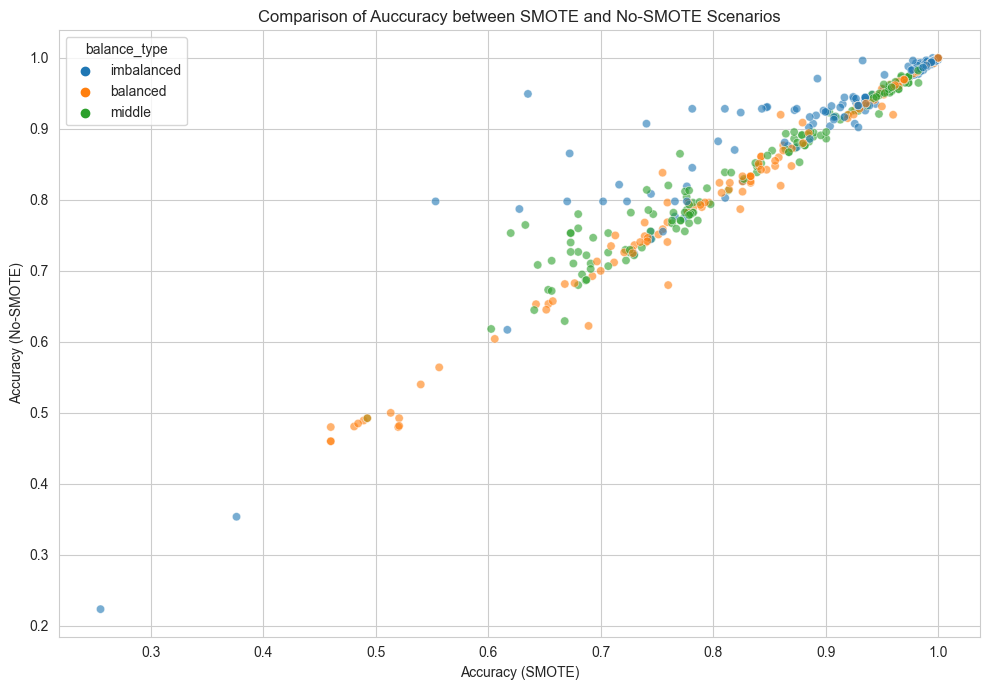

In [17]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=merged_data, 
                x="accuracy_smote", 
                y="accuracy_no_smote",
                alpha=0.6, 
                color="green",
                edgecolor="w",
                hue='balance_type')

plt.title("Comparison of Auccuracy between SMOTE and No-SMOTE Scenarios")
plt.xlabel("Accuracy (SMOTE)")
plt.ylabel("Accuracy (No-SMOTE)")

plt.tight_layout()
plt.show()

In [29]:
# Group by dataset and scenario, then compute the average for each metric
averaged_metrics = df.drop(columns=['algorithm', 'balance_type']).groupby(['dataset', 'scenario']).mean().reset_index()

# Pivot the data so that we have one row for each dataset and columns for each scenario
pivoted_metrics = averaged_metrics.pivot(index='dataset', columns='scenario').reset_index()

differences = {}
for metric in ['accuracy', 'f1_score', 'precision', 'recall', 'auc_score']:
    no_smote_col = (metric, 'no-smote')
    with_smote_col = (metric, 'smote')
    differences[metric] = pivoted_metrics[with_smote_col] - pivoted_metrics[no_smote_col]

differences_df = pd.DataFrame(differences)


In [32]:
from scipy.stats import wilcoxon

results = {}
for metric in metrics:
    stat, p_value = wilcoxon(differences_df[metric])
    results[metric] = {'Statistic': stat, 'P-Value': p_value}

wilcoxon_results = pd.DataFrame(results).T
wilcoxon_results

,Statistic,P-Value
accuracy,43.0,0.000269
f1_score,158.0,0.198241
precision,113.0,0.023845
recall,97.0,0.015788
auc_score,144.0,0.111991


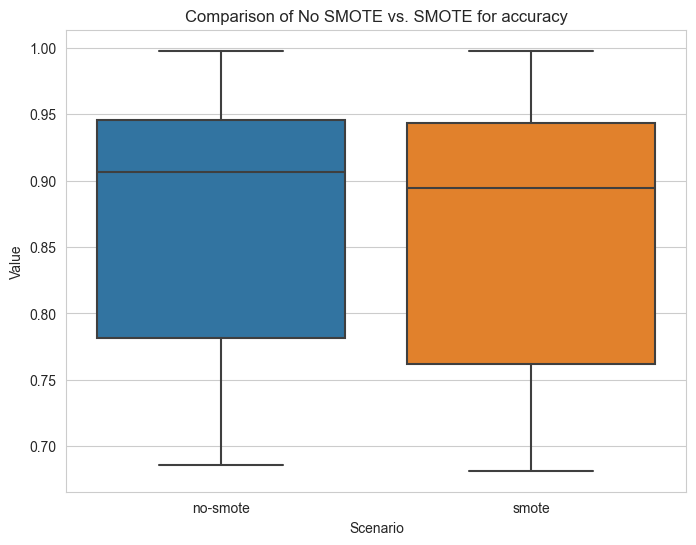

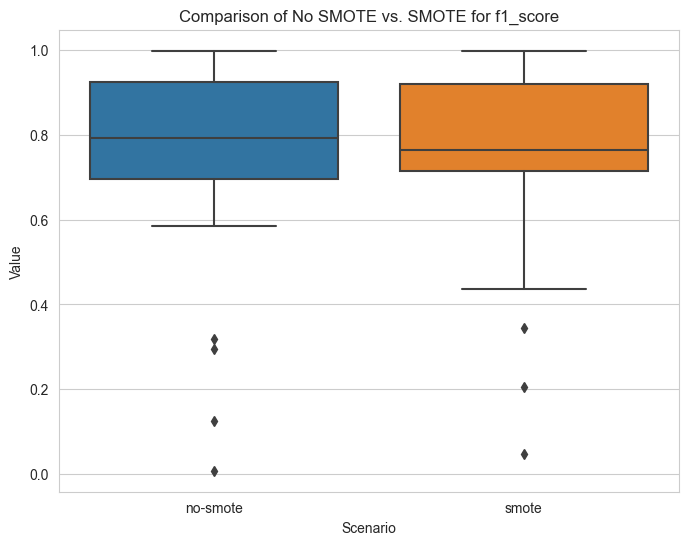

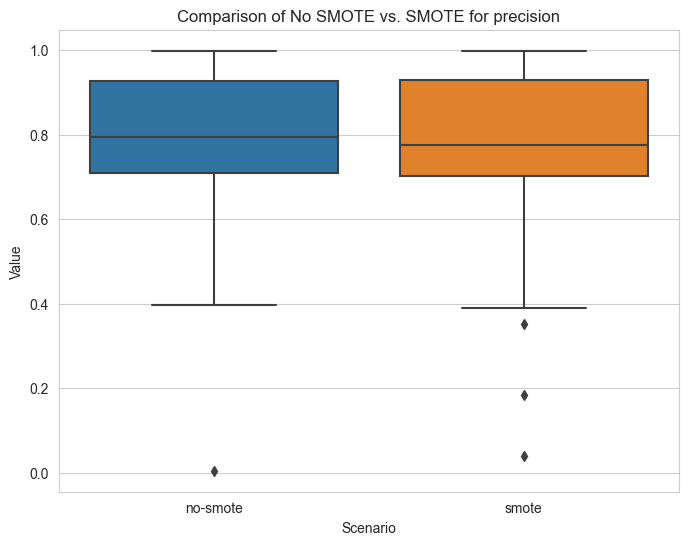

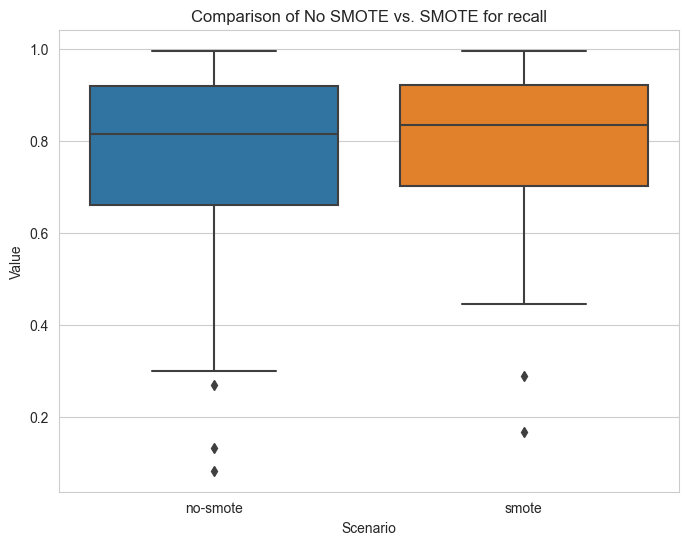

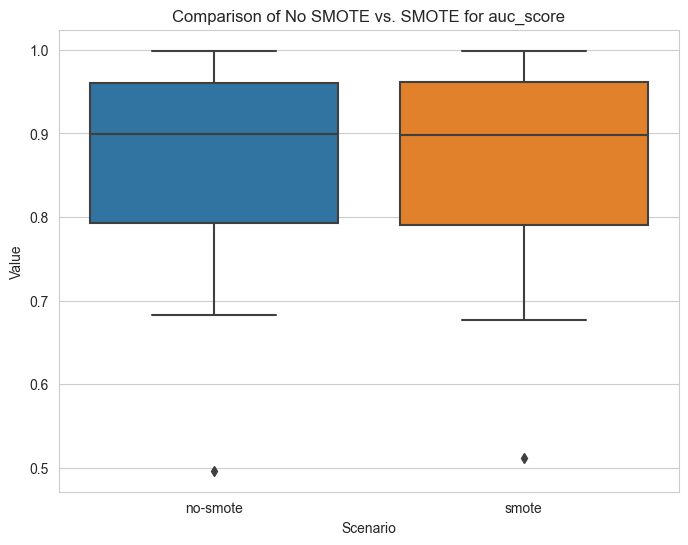

In [105]:
for metric in metrics:
    melted_data = pivoted_metrics[metric].melt(var_name='Scenario', value_name='Value')

    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Scenario', y='Value', data=melted_data)
    plt.title(f"Comparison of No SMOTE vs. SMOTE for {metric}")
    plt.show()

In [118]:
pivoted_metrics[metric]['smote'].mean()

0.8688904444444445

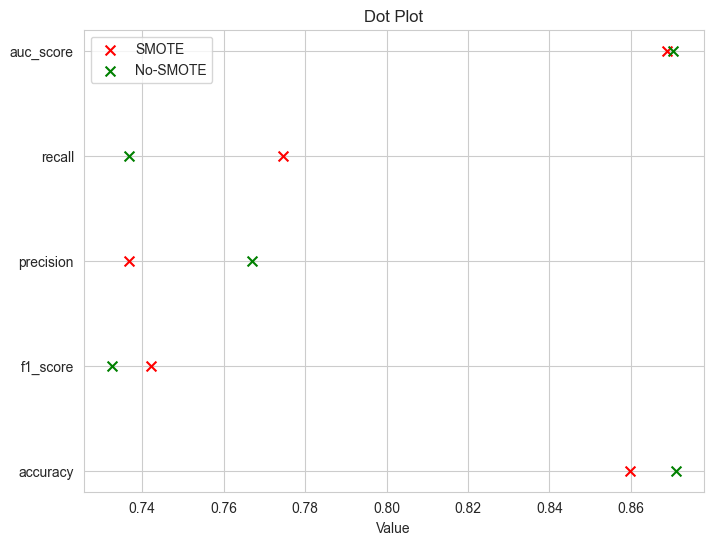

In [123]:
# Create the dot plot
fig, ax = plt.subplots(figsize=(8, 6))
values1 = [pivoted_metrics[i]['smote'].mean() for i in metrics]
values2 = [pivoted_metrics[i]['no-smote'].mean() for i in metrics]

# Plotting for the two sets of data
ax.scatter(values1, metrics, color='red', label='SMOTE', s=50, marker='x')
ax.scatter(values2, metrics, color='green', label='No-SMOTE', s=50, marker='x')

# Setting labels and title
ax.set_xlabel('Value')
ax.set_title('Dot Plot')
ax.legend()

plt.show()


In [155]:
def cohen_d(mean1, mean2, std1, std2, n1, n2):
    """
    Calculate Cohen's d for comparing two groups.
    
    Parameters:
    - mean1, mean2: means of the two groups
    - std1, std2: standard deviations of the two groups
    - n1, n2: sample sizes of the two groups
    
    Returns:
    - Cohen's d value
    """
    # Calculate the pooled standard deviation
    sp = ((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2)
    sp = sp**0.5
    
    # Calculate Cohen's d
    d = (mean1 - mean2) / sp
    return d




In [156]:
results = {}
for metric in metrics:
    smote_mean = pivoted_metrics[metric]['smote'].mean()
    no_smote_mean = pivoted_metrics[metric]['no-smote'].mean()
    smote_std = pivoted_metrics[metric]['smote'].std()
    no_smote_std = pivoted_metrics[metric]['no-smote'].std()
    n1 = len(pivoted_metrics[metric]['smote'])
    n2 = len(pivoted_metrics[metric]['no-smote'])
    cohen = cohen_d(smote_mean, no_smote_mean, smote_std, no_smote_std, n1, n2)
    results[metric] = cohen
results

{'accuracy': -0.10779240650522316,
 'f1_score': 0.03978295204568627,
 'precision': -0.13463648571720216,
 'recall': 0.16566952091056525,
 'auc_score': -0.011289205122141356}